# ランダム化学反応系を持った細胞の進化モデル

In [226]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


淘汰の階層

- 細胞内化学反応
- 細胞間拡散
- 細胞間人口(個体数)ダイナミクス


## いわゆる古澤モデル

### ランダム化学反応系

Symbiotic Cell Differentiation and Cooperative Growth in Multicellular Aggregates

https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1005042



# CPU版

In [1]:
class DiverseCells():
    def __init__(self,N,M, sparserate=0.7,seed=1,eps=0.001,dt=0.01):
        np.random.seed(seed)
        self.N=N #cell num
        self.M=M #chemical num
        self.k=np.maximum(0,np.random.random([M,M,M])-sparserate)#chemical coefficient 
        self.alpha=np.power(np.random.random(M),2) #nonlinear power
        self.D=np.power(np.random.random(M),2) #diffusion rate
        self.m=np.power(np.random.random(M),2) #growth death rate
        self.eps=eps #noise strength
        self.p=np.maximum(0, np.random.random([N,M])) #population
        self.dt=dt
        
    def initp(self,seed=1):
        np.random.seed(seed)
        self.p=np.maximum(0, np.random.random([N,M])) #population
        
    def showparam(self):
        print(N,M)
        print("chemical coefficient k")
        print(N,M)
        print("chemical coefficient k")
        print(k)
        
    def dvolume(self,dt):
        p_ave=np.mean(self.p,axis=0)
        
        palpha=np.power(self.p,self.alpha)
        pp=np.einsum("nil,nl->ni",np.einsum("jil,nj->nil", self.k, self.p),palpha)
        pn=np.einsum("nil,nl->ni",np.einsum("jil,nj->nil", self.k, self.p),palpha)       
        pd=self.D*(np.repeat(p_ave,N,axis=0).reshape([N,M])-self.p)
        pm=self.m*self.p
        return self.dt*(pp-pn-pm+pd)
        
    def prop(self,dt):           
        self.p=self.p+dvolume(dt)
        return self.p
    
    def timeseries(self,t):
        population=[cells.prop(dt) for t in range(t)]
        return np.array(population)
           
#enviroment change    
    def with_shock(self,t,TF ,newD):
        population= timeseries(t/2)
        self.D=newD
        population2=timeseries(t/2)
        return np.array([population,population2])

# GPU版

In [ ]:
class DiverseCells_gpu(torch.nn.Module):
     def __init__(self,N,M, sparserate=0.7,seed=1,eps=0.001):
        torch.manual_seed(seed)
        self.N=N #cell num
        self.M=M #chemical num
        self.k=torch.max(0,np.random.random([M,M,M])-sparserate)#chemical coefficient 
        self.alpha=torch.pow(np.random.random(M),2) #nonlinear power
        self.D=torch.pow(np.random.random(M),2) #diffusion rate
        self.m=torch.pow(np.random.random(M),2) #growth death rate
        self.eps=eps #noise strength
        self.p=np.max(0, np.random.random([N,M])) #population
        
    def initp(self,seed=1):
        torch.manual_seed(seed)
        self.p=torch.max(0, torch.rand((N,M))) #population
        
    def showparam(self):
        print(N,M)
        print("chemical coefficient k")
        print(k)
        print("chemical coefficient k")
        print(k)
        
    def prop(self,dt):       
        p_ave=torch.mean(self.p,axis=0)
        
        palpha=torch.pow(self.p,self.alpha)
        pp=torch.einsum("nil,nl->ni",torch.einsum("jil,nj->nil", self.k, self.p),palpha)
        pn=torch.einsum("nil,nl->ni",torch.einsum("jil,nj->nil", self.k, self.p),palpha)       
        pd=self.D*(torch.reshape(torch.repeat(p_ave,N,axis=0),(N,M))-self.p)
        pm=self.m*self.p
        
        self.p=self.p+dt*(pp-pn-pm+pd)
        
    def timeseries(self,t):
        population=[]
        for t in range(t):
            cells.prop(dt)
            population.append(cells.p)
        return np.array(population)
           
#enviroment change    
    def with_shock(self,t,TF ,newD):
        population= timeseries(t/2)
        self.D=newD
        population2=timeseries(t/2)
        #self.DDa   
        return np.array([population,population2])

## 多様性の計算

https://qiita.com/keisuke-ota/items/9701c583e153df467c05

In [311]:
def calc_entropy(p):
    pp=p/np.mean(p)
    return -np.sum(pp*np.log(pp))

### パラメーター

In [319]:
TN=10 # evolution trial num
T=2000 #evolution time period
N=300 #cell num
M=30 #chemical num

dt=0.05 #time step

In [327]:
cells=Cells(N,M,seed=1)
p=cells.timeseries(T)

# 様々な化学反応系のシミュレーション

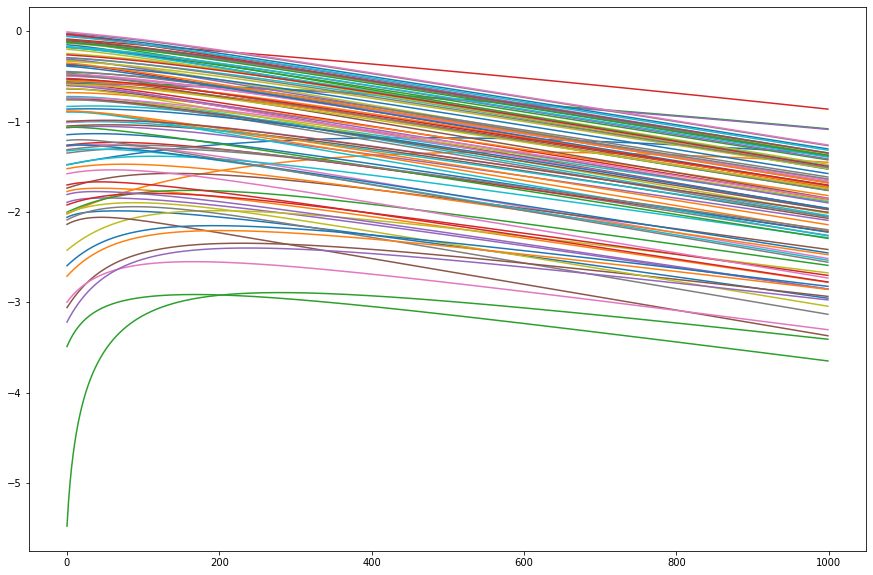

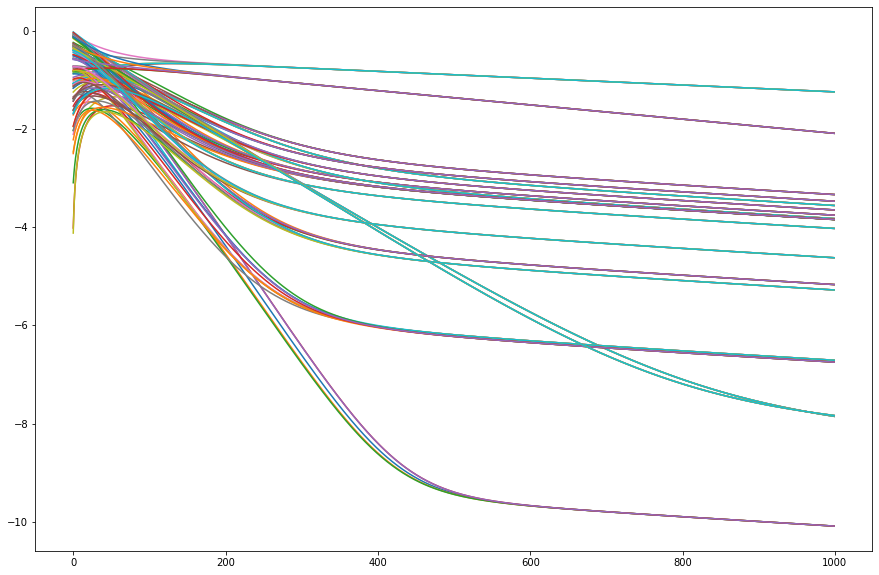

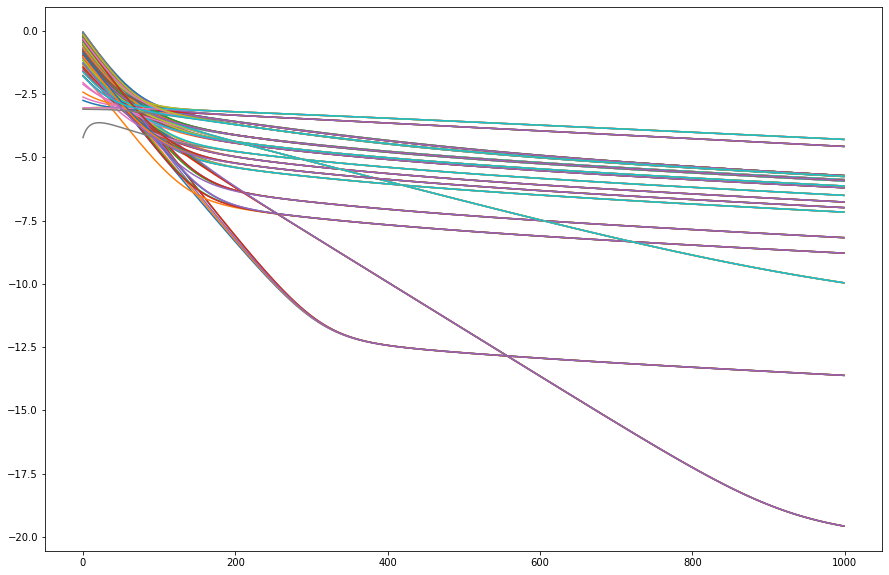

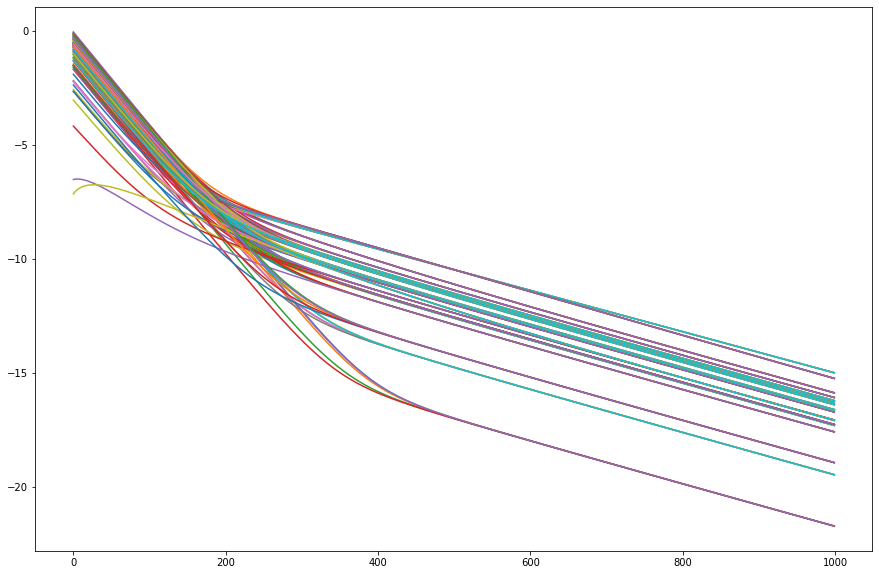

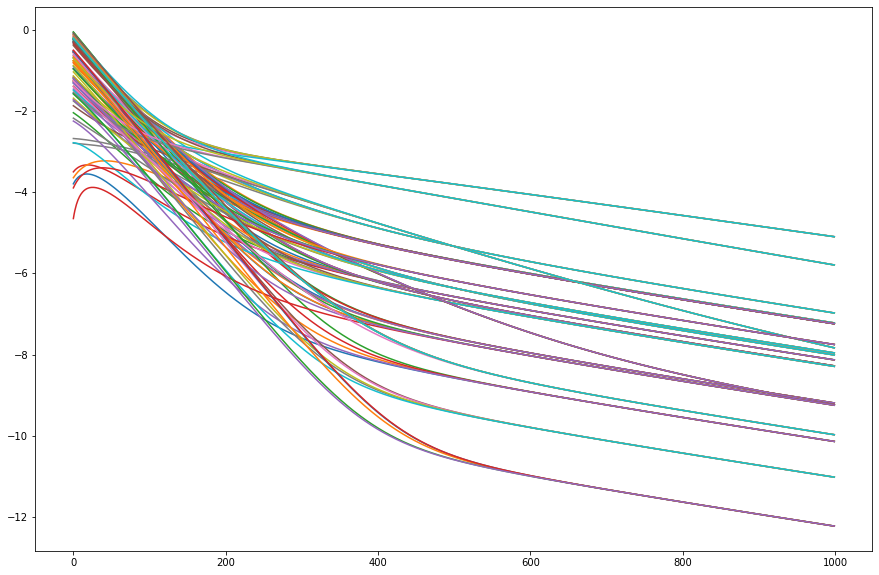

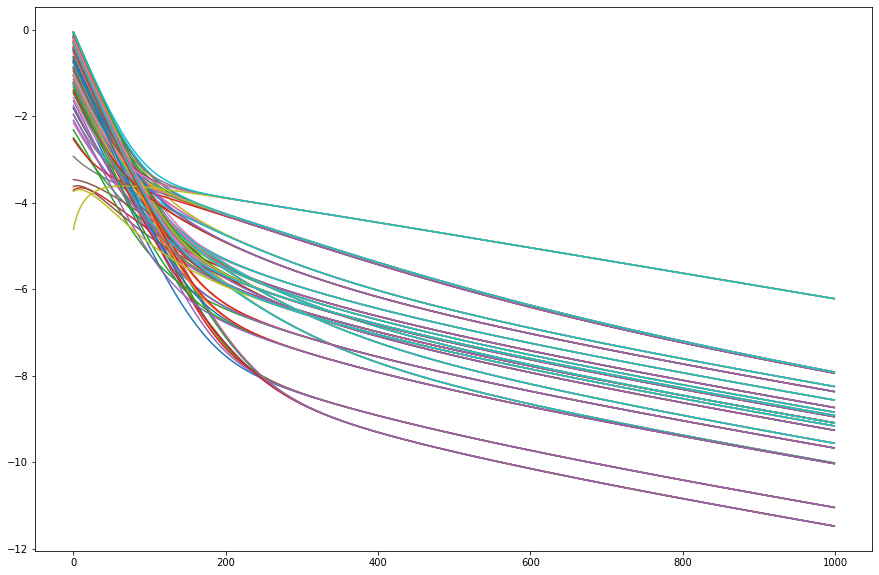

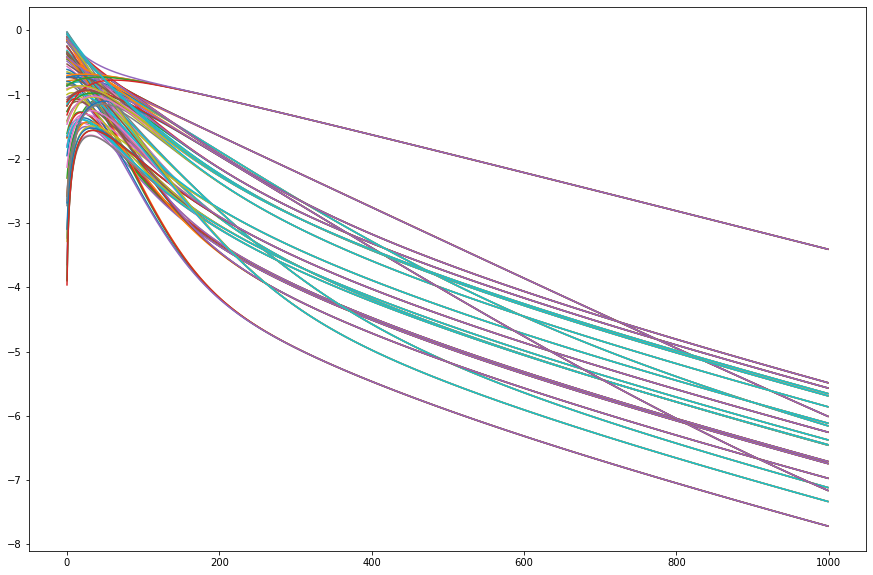

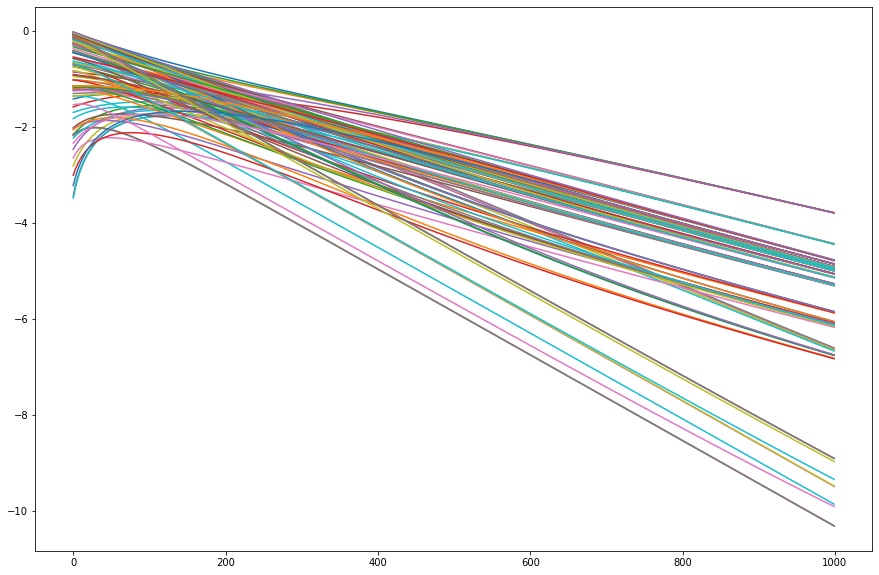

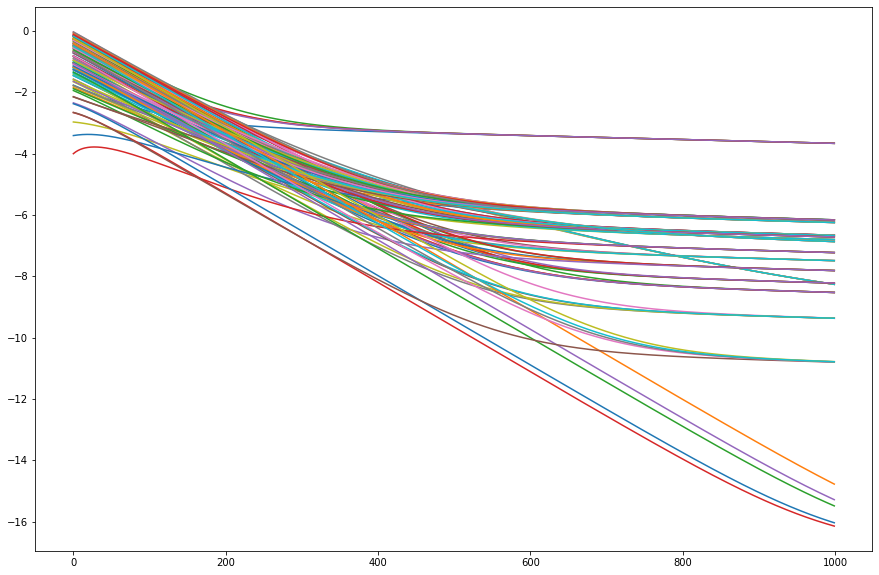

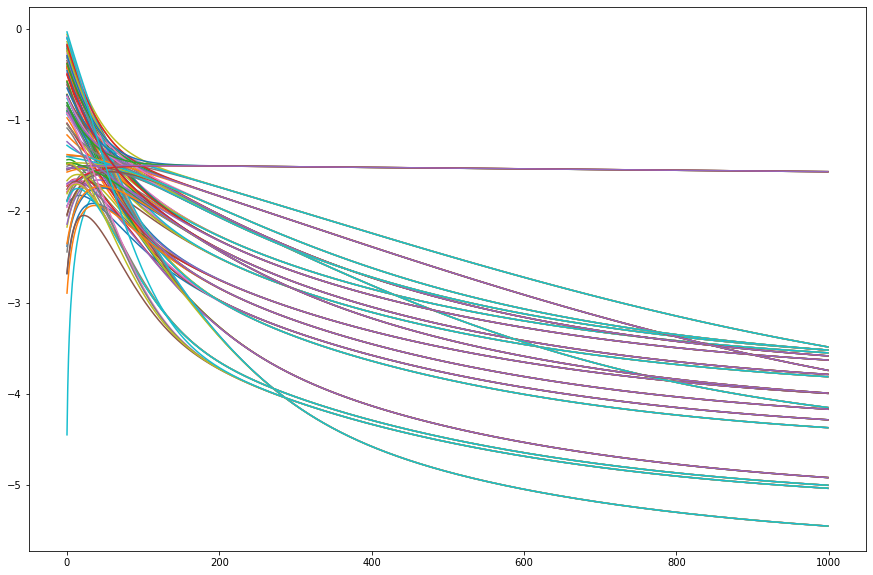

In [332]:
N=100
M=20
for i in range(10):
    cells=Cells(N,M,seed=i)
    p=cells.timeseries(1000)
    plt.figure(figsize=(15,10))
    plt.plot(np.log(p[:,:,0]))
    plt.show()

# 見たい性質

- 多様性と成長率
- 環境変化への応答、その多次元性

# 環境への応答

In [ ]:
=